In [2]:
# 预处理数据
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

train_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\train"
validation_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\validation"
test_dir = r"C:\Users\WW\Desktop\Python\keras\dogs-vs-cats\test"

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                    directory = train_dir,
                                                    target_size = (150, 150),
                                                    class_mode = "binary",
                                                    batch_size = 20)

validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                                                                        target_size = (150, 150),
                                                                                                        class_mode = "binary",
                                                                                                        batch_size = 20)

test_generator = test_datagen.flow_from_directory(directory  = test_dir,
                                                                                    target_size = (150, 150),
                                                                                    class_mode = "binary",
                                                                                    batch_size = 20)

Using TensorFlow backend.


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# 搭建模型
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = (150, 150 , 3)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2))
model.add(Flatten())
model.add(Dense(units = 64, activation = "relu", kernel_initializer = "glorot_uniform"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flat

In [5]:
# 编译模型
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# 运行模型
history = model.fit_generator(train_generator, 
                                                steps_per_epoch = 100, 
                                                epochs = 30, 
                                                verbose = 1, 
                                                validation_data = validation_generator,
                                                 validation_steps = 50)

# 测试模型
score = model.evaluate_generator(test_generator, steps = 50, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 13s 131ms/step - loss: 0.6922 - acc: 0.5395 - val_loss: 0.6808 - val_acc: 0.6110
Epoch 2/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6569 - acc: 0.6260 - val_loss: 0.6306 - val_acc: 0.6570
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6019 - acc: 0.6735 - val_loss: 0.6015 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 7s 66ms/step - loss: 0.6005 - acc: 0.6675 - val_loss: 0.6076 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 7s 66ms/step - loss: 0.5284 - acc: 0.7300 - val_loss: 0.5705 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 7s 65ms/step - loss: 0.5156 - acc: 0.7425 - val_loss: 0.5770 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 6s 65ms/step - loss: 0.4433 - acc: 0.7845 - val_loss: 0.5566 - val_acc: 0.7370
Epoch 8/30
100/100 

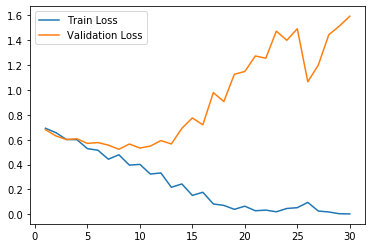

In [7]:
plt.figure()
epoch = [i for i in range(1, 31)]
plt.plot(epoch, history.history["loss"], label = "Train Loss")
plt.plot(epoch, history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()